In [2]:
%matplotlib inline

In [134]:
from pRFline import surface
from pRFline.utils import SubjectsDict
from linescanning import utils,plotting,prf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
opj = os.path.join

parameters shape: (10,)
Reading settings from '/data1/projects/MicroFunc/Jurjen/projects/VE-pRF/code/prf_analysis.yml'
Instantiate 'direct' HRF
Using constraint(s): ['tc', 'tc']
Inserting parameters from <class 'numpy.ndarray'> as 'norm_iter' in <pRFline.surface.PredpRF object at 0x7f2b44cc5190>


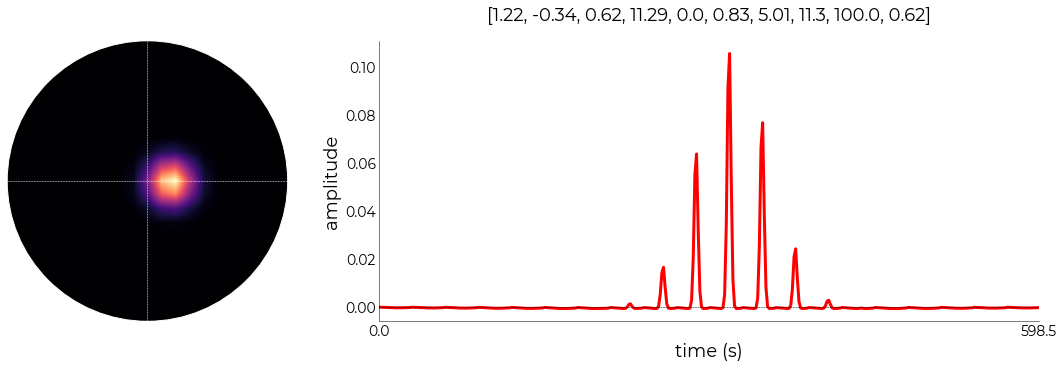

In [303]:
subject = "sub-005"
model = "norm"

SD = SubjectsDict()
targ_vert = SD.get_target(subject)

pars_fn = opj(
    os.environ.get("PRF"),
    subject,
    "ses-1",
    f"{subject}_ses-1_task-2R_roi-V1_model-{model}_stage-iter_desc-prf_params.pkl"
    )

pars = prf.read_par_file(pars_fn)[targ_vert,:]
print(f"parameters shape: {pars.shape}")
tester = surface.PredpRF(
    prf_params=pars,
    verbose=True,
    model=model,
    TR=1.5,
    grid_size=20,
    title="pars"
)

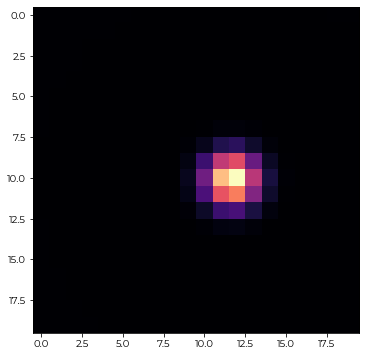

In [306]:
fig,axs = plt.subplots(figsize=(6,6))
axs.imshow(tester.pred.reshape(tester.grid_size,tester.grid_size), cmap="magma")

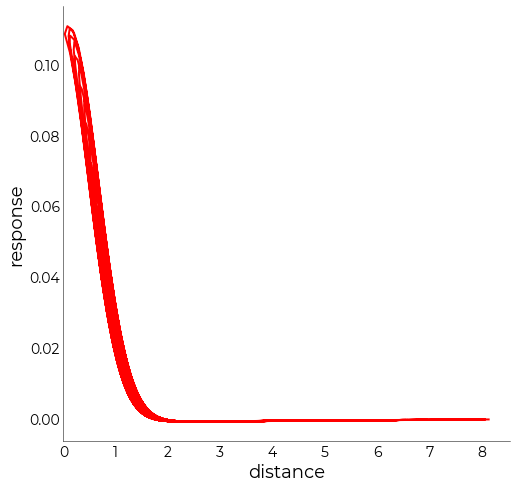

In [295]:
plotting.LazyPlot(
    tester.pred,
    xx=tester.dist_to_prf,
    line_width=2,
    color="r",
    x_label="distance",
    y_label="response",
    figsize=(8,8)
)

smallest distance = idx 6160 (0.02)
max response = idx 6059 (distance to pRF = 0.14)


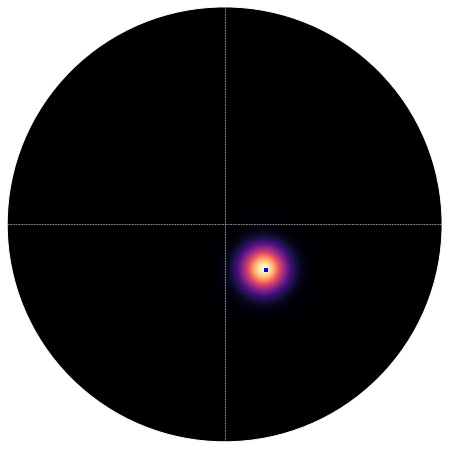

In [293]:
min_idx = np.where(tester.dist_to_prf == np.amin(tester.dist_to_prf))[0][0]
print(f"smallest distance = idx {min_idx} ({round(tester.dist_to_prf[min_idx],2)})")

max_resp = min_idx = np.where(tester.pred == np.amax(tester.pred))[0][0]
print(f"max response = idx {max_resp} (distance to pRF = {round(tester.dist_to_prf[max_resp],2)})")

cmap_r = utils.make_binary_cm("red")
cmap_b = utils.make_binary_cm("blue")

fig,axs = plt.subplots(figsize=(8,8))
plotting.LazyPRF(
    tester.rf,
    vf_extent=[-5,5],
    ax=axs
)
axs.imshow(
    tester.dm[...,min_idx], 
    extent=tester.vf_extent+tester.vf_extent, 
    cmap=cmap_r)

axs.imshow(
    tester.dm[...,max_resp], 
    extent=tester.vf_extent+tester.vf_extent, 
    cmap=cmap_b)    

# plt.imshow(tt_r, extent=tester.vf_extent+tester.vf_extent)
plt.show()

In [276]:
pars

array([  1.03606726,  -1.15708413,   0.38720372, 162.90780487,
         0.        ,   0.95297409,  18.00015763, 162.91093094,
        99.99674902,   0.88385837])

In [263]:
prf.distance_centers(pars,tester.coords[min_idx])

0.23323930956672623

In [169]:
tester.coords[ix]

(-2.6, 2.6)

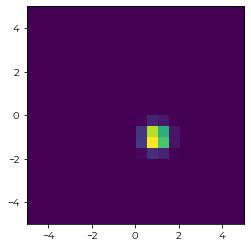

In [275]:
tt_r = tester.pred.reshape(20,20)
plt.imshow(tt_r, extent=tester.vf_extent+tester.vf_extent)

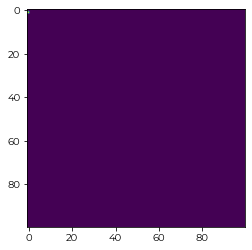

In [301]:
plt.imshow(tester.dm[...,100])